<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Diego Roberto Arancibia Delgado</h3>
<h4>link del repositorio:https://github.com/drArancibiaDelgado/sis420-/tree/main/Examenes/parcial%202<h4>



In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('smoke_detection_iot.csv', delimiter=",")

data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [5]:

# Paso 1: Eliminar columnas innecesarias
data = data.drop(['Unnamed: 0'], axis=1)
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Eliminar las columnas 'CustomerId' y 'Surname'



In [6]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [7]:
scaled_data

array([[-0.53394841,  0.28062169,  0.99494707, ..., -0.07388861,
        -1.38347572, -1.58245641],
       [-0.53393932,  0.2816663 ,  0.91711549, ..., -0.07388861,
        -1.38334411, -1.58245641],
       [-0.53393022,  0.28264127,  0.83702792, ..., -0.07388861,
        -1.38321249, -1.58245641],
       ...,
       [ 3.07252608,  0.20171901, -3.68848353, ..., -0.07387569,
        -0.62786328, -1.58245641],
       [ 3.07253518,  0.21676136, -3.66592365, ..., -0.07387569,
        -0.62773167, -1.58245641],
       [ 3.07254427,  0.23180371, -3.61177995, ..., -0.07387569,
        -0.62760005, -1.58245641]])

In [8]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([0, 0, 0, ..., 2, 2, 2])

In [9]:
#
kmeans.cluster_centers_

array([[-0.27859248, -0.13961044,  0.33422311, -0.13480334, -0.11280585,
         0.09457824, -0.23504271,  0.30978786, -0.10713771, -0.09241627,
        -0.11237838, -0.09107231, -0.07384928,  0.47015879,  0.63162447],
       [ 1.15838354,  0.3253853 , -2.42271048,  6.02224731,  6.73539395,
        -5.39284532, -4.84102845, -2.16841496,  9.17997786,  8.30123218,
         9.18358585,  8.21179663,  7.00525753, -0.83748412, -1.16033921],
       [ 0.62204953,  0.32062303, -0.71023831,  0.11052254,  0.03334621,
        -0.03682347,  0.72771642, -0.66100355, -0.06538309, -0.06974322,
        -0.05304747, -0.06981999, -0.06869715, -1.08875323, -1.46143263]])

In [10]:
import numpy as np

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-0.71048219  0.89763648 -0.81999509 -0.23568473 -0.14167861 -0.56321198
   1.42039428 -0.89733336 -0.10714634 -0.09241953 -0.11239463 -0.09107716
  -0.07384985 -1.15643663 -1.58245641]
 [-0.07072791  0.76253392 -0.06875116 -0.08629011 -0.14167861  0.14147311
  -0.56317185  0.07838049 -0.10731978 -0.09250555 -0.11264548 -0.09115256
  -0.07385261  1.63621008  0.63192894]
 [-0.18488988  0.51043533  0.77386027 -0.13288792  0.00943346 -0.59257386
  -0.40894917  0.35254182 -0.10622495 -0.09197425 -0.11101383 -0.09066266
  -0.07383046 -0.01663455  0.63192894]
 [-0.3582328   0.3098707   0.07450406 -0.09409909 -0.14167861 -0.08241122
  -0.52871785  0.03631739 -0.10736314 -0.09252579 -0.11271815 -0.09117469
  -0.07385354  1.16054672  0.63192894]]
Predicciones de cluster para las nuevas muestras:
[2 0 0 0]


<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

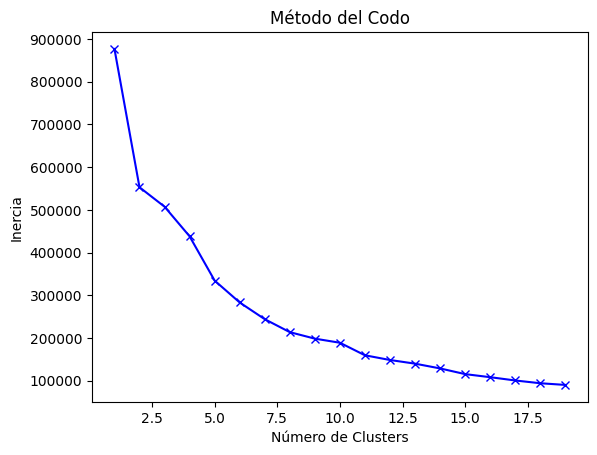

El número óptimo de clusters según el método del codo es: 19


In [11]:
import numpy as np
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster
print("El número óptimo de clusters según el método del codo es:", best_num_clusters_codo)



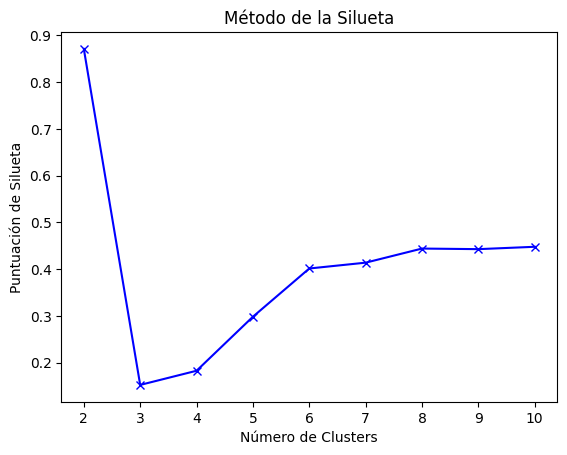

El número óptimo de clusters según la puntuación de silueta es: 2


In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


In [13]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8606732573761179
